# **Rice Datathon 2024 : Beginner Track**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [52]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
DATADIR = '/content/drive/My Drive/Rice Datathon 2024/Beginner Track/'

Mounted at /content/drive


In [ ]:
#Import data
df = pd.read_csv(DATADIR + 'CAERS_ProductBased.csv')

In [70]:
# Data Wrangling
# Handle missing data using forward fill
df.fillna(method='ffill', inplace=True)
# Remove duplicates
df.drop_duplicates(inplace=True)

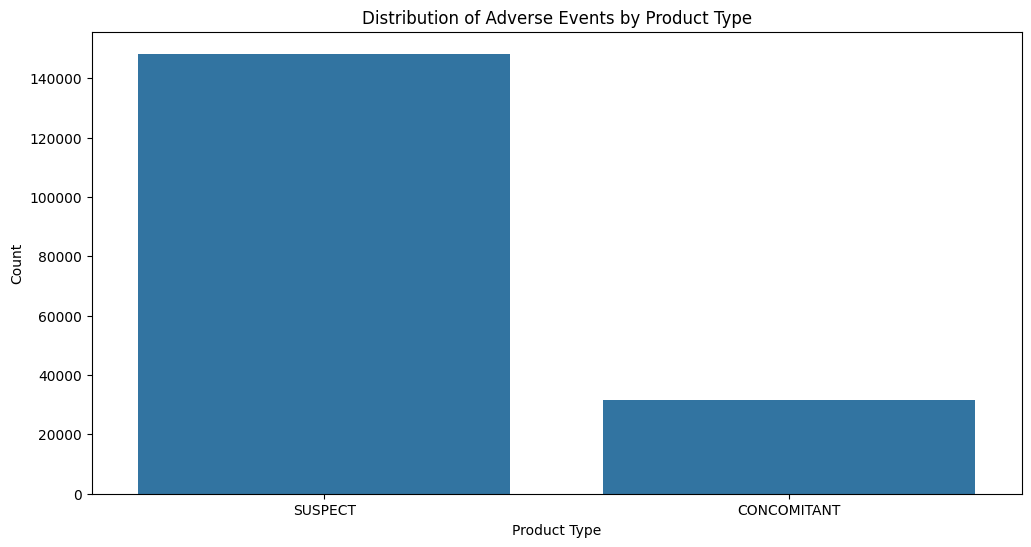

In [71]:
# Data Exploration and Analysis
# Visualize the distribution of adverse events by product type
plt.figure(figsize=(12, 6))
sns.countplot(x='PRODUCT_TYPE', data=df)
plt.title('Distribution of Adverse Events by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

In [72]:
# Interpretation: Understanding the distribution of adverse events by product type
# This visualization helps us identify which product types have the highest number of adverse events.

In [73]:
#Identify common symptoms reported in adverse events
common_symptoms = df['CASE_MEDDRA_PREFERRED_TERMS'].value_counts().head(10)
print("Top 10 Common Symptoms Reported:")
print(common_symptoms)

Top 10 Common Symptoms Reported:
Ovarian cancer              11128
Death, Injury                5954
OVARIAN CANCER               3618
Death, Ovarian cancer        2703
CHOKING                      1802
Ovarian cancer stage I       1678
ALOPECIA                     1491
Ovarian cancer stage III     1401
DIARRHOEA                    1359
Alopecia                     1256
Name: CASE_MEDDRA_PREFERRED_TERMS, dtype: int64


In [74]:
# Analysis Rationale: Identifying common symptoms can highlight prevalent issues reported by consumers.
# This information can guide further investigation and regulatory actions.

Potentially Dangerous Products:
                                                  PRODUCT      CASE_OUTCOME
28                            FAST ACTING NANO D8 GUMMIES   Hospitalization
29                                      Prenatal vitamins   Hospitalization
33             SOVERIGN SILVER BIO-ACTIVE SILVER HYDROSOL  Life Threatening
147                                        ARTRI AJO KING   Hospitalization
161                                  PRESERVISION AREDS 2             Death
...                                                   ...               ...
206420  WESTERN FAMILY GRADE A FANCY VEGETABLES COUNTR...  Life Threatening
206574                                        LIPOKINETIX   Hospitalization
206594                                           TRI-LITE  Life Threatening
206602                                             AM 300   Hospitalization
206605                                             AM 300   Hospitalization

[19076 rows x 2 columns]


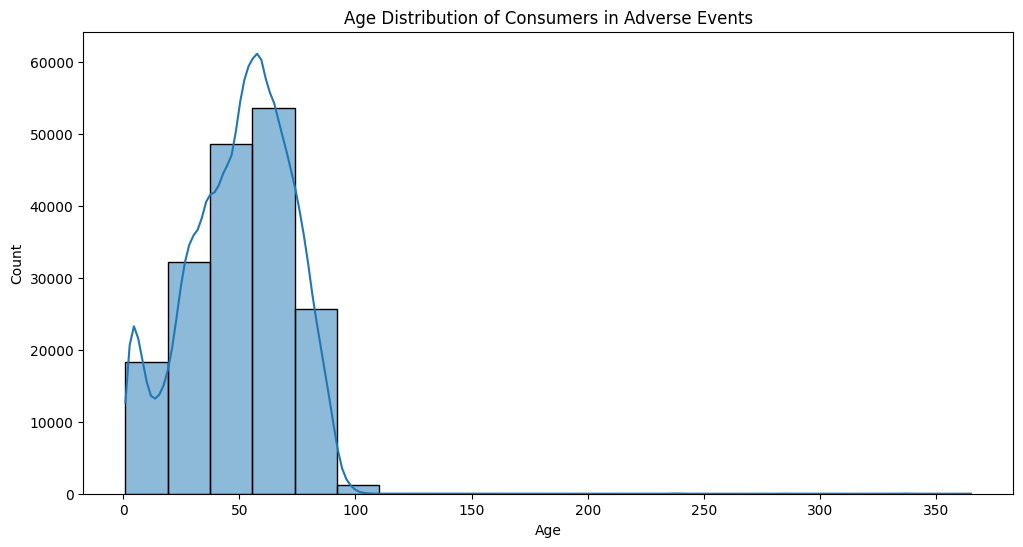

In [75]:
# Identify potentially dangerous products based on outcomes
dangerous_products = df[df['CASE_OUTCOME'].isin(['Death', 'Life Threatening', 'Hospitalization'])]
print("Potentially Dangerous Products:")
print(dangerous_products[['PRODUCT', 'CASE_OUTCOME']])

# EDA: Explore age distribution of consumers
plt.figure(figsize=(12, 6))
sns.histplot(x='PATIENT_AGE', data=df, bins=20, kde=True)
plt.title('Age Distribution of Consumers in Adverse Events')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [76]:
# Interpretation: Examining the age distribution helps us understand the demographics of consumers
# experiencing adverse events, which can inform targeted safety measures.

# Potential Regulatory Actions:
# - Increased surveillance on product types with high adverse event counts.
# - Investigate common symptoms reported for potential trends or issues.
# - Prioritize regulatory actions for products associated with severe outcomes.

In [77]:
# Machine Learning: Build a predictive model
# For simplicity, let's predict whether an adverse event outcome is severe (Death, Life Threatening, or Hospitalization)
# Create a binary target variable 'SevereOutcome'
df['SevereOutcome'] = df['CASE_OUTCOME'].isin(['Death', 'Life Threatening', 'Hospitalization']).astype(int)

# Select relevant features for the model (you may need to preprocess and select features appropriately)
features = ['PATIENT_AGE']
X = df[features]
y = df['SevereOutcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict outcomes on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     32228
           1       0.00      0.00      0.00      3711

    accuracy                           0.90     35939
   macro avg       0.45      0.50      0.47     35939
weighted avg       0.80      0.90      0.85     35939

Accuracy: 0.8965191018114027


In [ ]:
# Analysis Rationale: Building a predictive model allows us to assess the impact of demographic features
# on the likelihood of severe adverse outcomes. This information can inform targeted regulatory actions.